In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

In [67]:
df = pd.read_csv('data/zomato.csv')

In [68]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [69]:
df.shape

(51717, 17)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [71]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## dropping unnecessary columns

In [72]:
df.drop(['url', 'address', 'phone', 'location', 'dish_liked', 'reviews_list', 'menu_item'], axis=1, inplace=True)

In [73]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## rename columns

In [74]:
df = df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'})

In [75]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## dropping duplicates

In [76]:
df.duplicated().sum()

np.int64(124)

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## cleaning individual rows

In [79]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['name'] = df['name'].apply(lambda x: name_clean(x))


In [80]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## removing nan, NEW, '-' values from rate

In [81]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [82]:
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('Nan', np.nan)
df['rate'] = df['rate'].replace('nan', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)

In [83]:
def remove_slash(value):
    if pd.isna(value):
        return value
    return float(str(value).replace('/5', '').strip())
df['rate'] = df['rate'].apply(remove_slash)

In [84]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## converting to correct data types

In [85]:
df['rate'] = df['rate'].astype(float)

In [86]:
df['online_order'] = df['online_order'].replace('Yes', 1)
df['online_order'] = df['online_order'].replace('No', 0)
df['book_table'] = df['book_table'].replace('Yes', 1)
df['book_table'] = df['book_table'].replace('No', 0)

/var/folders/rv/j5tylb195fl0k9m21f19znzm0000gn/T/ipykernel_27850/3416698835.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['online_order'] = df['online_order'].replace('No', 0)
/var/folders/rv/j5tylb195fl0k9m21f19znzm0000gn/T/ipykernel_27850/3416698835.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['book_table'] = df['book_table'].replace('No', 0)


In [87]:
df['online_order'] = df['online_order'].astype(bool)
df['book_table'] = df['book_table'].astype(bool)

In [88]:
df.dtypes

name             object
online_order       bool
book_table         bool
rate            float64
votes             int64
rest_type        object
cuisines         object
cost             object
type             object
city             object
dtype: object

In [89]:
df['cost'] = df['cost'].str.replace(',', '')

In [90]:
df['cost'] = df['cost'].astype(float)

In [91]:
df['type'].astype(str)

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: type, Length: 51593, dtype: object

In [92]:
df['city'].astype(str)

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715      Whitefield
51716      Whitefield
Name: city, Length: 51593, dtype: object

In [93]:
df.dtypes

name             object
online_order       bool
book_table         bool
rate            float64
votes             int64
rest_type        object
cuisines         object
cost            float64
type             object
city             object
dtype: object

In [94]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


## cleaning null values

In [95]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate            10003
votes               0
rest_type         227
cuisines           45
cost              344
type                0
city                0
dtype: int64

<Axes: >

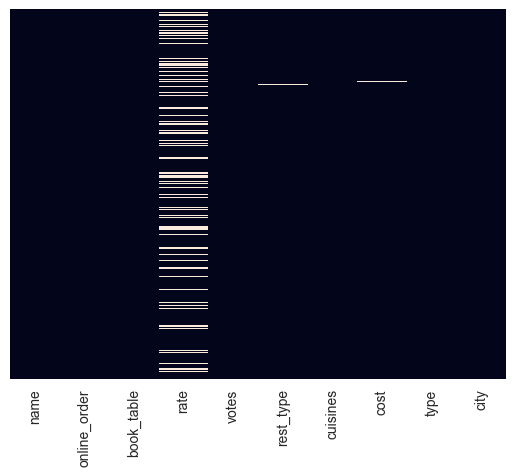

In [96]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

## dropping null values

In [97]:
df.dropna(inplace=True)

In [98]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

<Axes: >

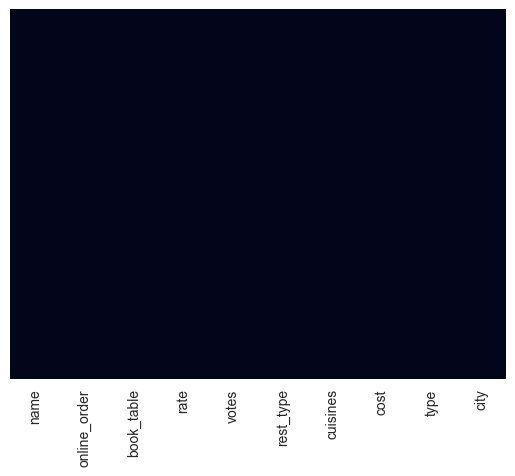

In [99]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

## how the cleaned dataset looks like

In [100]:
df.shape

(41190, 10)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41190 non-null  object 
 1   online_order  41190 non-null  bool   
 2   book_table    41190 non-null  bool   
 3   rate          41190 non-null  float64
 4   votes         41190 non-null  int64  
 5   rest_type     41190 non-null  object 
 6   cuisines      41190 non-null  object 
 7   cost          41190 non-null  float64
 8   type          41190 non-null  object 
 9   city          41190 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 2.9+ MB


In [102]:
df.describe()

,rate,votes,cost
count,41190.000000,41190.000000,41190.000000
mean,3.701731,352.066715,603.545909
std,0.439929,883.461453,464.651174
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


In [103]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


## exporting cleaned csv as csv

In [104]:
df.to_csv('data/zomato_cleaned.csv', index=False)

In [109]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [110]:
import openpyxl

In [111]:
df.to_excel('data/zomato_cleaned.xlsx', index=False)